### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [3]:
df_train.columns

Index([u'genre_id', u'ts_listen', u'media_id', u'album_id', u'context_type',
       u'release_date', u'platform_name', u'platform_family',
       u'media_duration', u'listen_type', u'user_gender', u'user_id',
       u'artist_id', u'user_age', u'is_listened'],
      dtype='object')

In [4]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


In [5]:
y = df_train["is_listened"].values

In [6]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

### Let's inspect the categorical variables!

In [7]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 2922
media_id: 452975
album_id: 151471
context_type: 74
release_date: 8902
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 19918
artist_id: 67142
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [8]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [9]:
cols_for_target_encoder = ["genre_id", "context_type", "user_id", "media_id"]
cols_for_onehot = ["platform_name", "platform_family", "listen_type", "user_gender", "user_age"]
cols_for_rank = ["artist_id"]

target = "is_listened"

In [10]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [11]:
te.fit(df_train)

In [12]:
te.transform(df_train)
te.transform(df_test)

In [13]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)

In [14]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [15]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,0.688147,1480597215,0.000000,41774,0.695604,20040704,1,0,223,0,0,0.676991,66570,29,0
1,0.567614,1480544735,1.000000,43941,0.688532,20060301,2,1,171,0,0,0.575000,11629,30,1
2,0.744035,1479563953,1.000000,48078,0.573604,20140714,2,1,149,1,1,0.986755,4816,29,1
3,0.663155,1480152098,0.000000,71521,0.688532,20001030,0,0,240,0,1,0.586977,1115,30,0
4,0.663155,1478368974,0.866667,71718,0.688532,20080215,0,0,150,0,1,0.933868,3491,24,1


In [16]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [17]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,media_duration,user_id,artist_id,is_listened,...,user_age_21,user_age_22,user_age_23,user_age_24,user_age_25,user_age_26,user_age_27,user_age_28,user_age_29,user_age_30
0,0.688147,1480597215,0.000000,41774,0.695604,20040704,223,0.676991,66570,0,...,0,0,0,0,0,0,0,0,1,0
1,0.567614,1480544735,1.000000,43941,0.688532,20060301,171,0.575000,11629,1,...,0,0,0,0,0,0,0,0,0,1
2,0.744035,1479563953,1.000000,48078,0.573604,20140714,149,0.986755,4816,1,...,0,0,0,0,0,0,0,0,1,0
3,0.663155,1480152098,0.000000,71521,0.688532,20001030,240,0.586977,1115,0,...,0,0,0,0,0,0,0,0,0,1
4,0.663155,1478368974,0.866667,71718,0.688532,20080215,150,0.933868,3491,1,...,0,0,0,1,0,0,0,0,0,0


In [17]:
#df_train = rank_categorical(df_train, cols_for_rank)

In [18]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'media_duration', 'user_id', 'artist_id',
       'is_listened', 'platform_name_1', 'platform_name_2',
       'platform_family_1', 'platform_family_2', 'listen_type_1',
       'user_gender_1', 'user_age_19', 'user_age_20', 'user_age_21',
       'user_age_22', 'user_age_23', 'user_age_24', 'user_age_25',
       'user_age_26', 'user_age_27', 'user_age_28', 'user_age_29',
       'user_age_30'], dtype=object)

In [19]:
### Drop
to_drop = ['ts_listen', 'media_id', 'album_id', 'release_date', 'media_duration', 'user_id', 'artist_id']
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [20]:
features = [col for col in df_train.columns.values if col != target]
features

['genre_id',
 'context_type',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'listen_type_1',
 'user_gender_1',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
model.score(X_test, y_test)

0.70351581956743336

0.70345496362865445

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, model.predict(X_test))

array([[118877, 359265],
       [ 88950, 944675]])

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.76590440193495424

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

*********************************
Accuracy: 0.77
Precision: 0.81806930346
Recall: 0.846022816805
F1-Score: 0.831811277785
[[282732 194622]
 [159276 875137]]
Roc Area: 0.719156407711


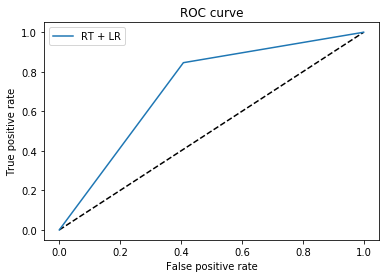

*********************************


0.71915640771132905

In [46]:
complete_report(y_test, model.predict(X_test))

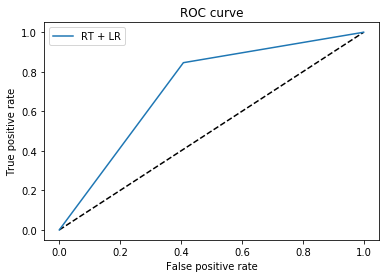

In [44]:
roc_curve_label(y_test, model.predict(X_test))

In [47]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [48]:
p = model.predict_proba(df_test[features])

In [49]:
p = p[:, 1]

In [50]:
build_kaggle_submission(p, "random_forest")

### GridSearch and XGBoost

In [23]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import numpy as np

In [31]:
model = Sequential()
model.add(Embedding(df_train["album_id"].max(), 64, input_length=10))
model.add(Dense(1, activation="relu"))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))
print(input_array)
model.compile('rmsprop', 'mse')
model.fit(input_array, np.array([1]))

output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)
print(output_array)

[[590 577 415 478 374  15 643 903 541 539]
 [548 127 164 810 940 854 225 366 792 768]
 [221 898 795 727 984 675 847 268   3 138]
 [843 711 705 519 635 455  86 537 497  55]
 [791 573 946 183 413 998 475  28 759 826]
 [878  73 686 912 589 261 617 294 732 800]
 [652 256 493 769 217 469 622 280 778 493]
 [895 587 753 766 756 376 819 580 986 630]
 [534 530 497 138 404 980 258 338 240 877]
 [985 415 903 199 698 658 155 289 842 911]
 [866 437 120 128 978 872 282 539  45 781]
 [798 252 181 585  67 495 921 739 138 906]
 [ 48 909 119 104  41 640 764 795 573 890]
 [247 921 992 981 895 281  75 444 714 392]
 [132 627 459 511 745 185 328 575 666 518]
 [476 910 537 930 584 791 536 424  78 954]
 [447 418  56 328 235 381 896  76 701 851]
 [520 110 842  38 734 735 698 147 286 311]
 [950 899 897 231   6 177 841 415 987 165]
 [340 466 789 747 657 102 133  27 373 967]
 [695  75 793 943 222 282 117 544 477 984]
 [381 848 929 718 636 227 735 275 173 264]
 [437 356 383 220 467 331 473 476 347 258]
 [841 488 4

ValueError: Error when checking model target: expected dense_3 to have 3 dimensions, but got array with shape (1, 1)

In [30]:
df_train["album_id"].max()

14720858

In [27]:
output_array

array([[[ 0.00031757],
        [ 0.02103295],
        [ 0.        ],
        [ 0.00950179],
        [ 0.        ],
        [ 0.00407833],
        [ 0.        ],
        [ 0.01537797],
        [ 0.        ],
        [ 0.01353931]],

       [[ 0.        ],
        [ 0.0655507 ],
        [ 0.        ],
        [ 0.        ],
        [ 0.00722662],
        [ 0.        ],
        [ 0.        ],
        [ 0.04507061],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.00116592],
        [ 0.        ],
        [ 0.06946108],
        [ 0.01550325],
        [ 0.03876622],
        [ 0.03544477],
        [ 0.        ],
        [ 0.03845602],
        [ 0.03600059]],

       [[ 0.06119933],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.08542502],
        [ 0.03641778]],

       [[ 0.00646953],
        [ 0.        ],
        [ 0.06424605],
   